
 **Nombre:** Ana Karen Valencia

 **Matrícula:** A01067716

#**Data Base digits**

1. Load database
2. Entender los datos
3. Plotear algunos ejemplos (digits)
4. Aplicar estadística descriptiva y extraer conclusiones
5. Visualizacion
    
    - Boxplot de algunas varibales

    - Scartter plot entre algunas variables

6. Do K-means con todas las variables

  - Revisar reusltados

7. Do k mems con solo varibales de una de las filas de c/imagen

  - Con que filas se hace bien o mal

8. Do K-means con solo variables de una de las columnas de la imagen

  - Con que columnas se hace bien o mal

9. Conclusiones

#**Conclusiones**


Al realizar el clustering utilizando solo las columnas de las imágenes, el algoritmo K-means comete más errores de asignación en comparación con usar solo las filas. Por lo que se puede concluir que las filas de píxeles parecen contener más información relevante para distinguir entre dígitos que las columnas.

Al imprimir las imágenes de un solo dígito (por ejemplo, el "0"), K-means agrupa consistentemente todas las imágenes del mismo dígito en el mismo cluster. Aunque el número del cluster no coincide con el dígito real, todas las imágenes similares son asignadas al mismo cluster. Esto quiere decir que K-means reconoce patrones similares  y los agrupa correctamente en el mismo cluster, aunque el número del cluster no coincida con la etiqueta original.


##Referencias:

The digit Dataset. (s. f.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

Chatgp para buscar las funciones

#**Parte 1**

Load data set

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

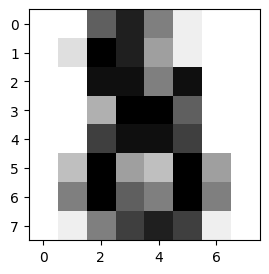

In [9]:

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

#**Parte 2**

  Entender los datos:


  - Los datos contenidos en la database digits.cvs son pixeles
  
  - El conjunto de datos digits es un conjunto de imágenes de dígitos escritos a mano, del 0 al 9.
  
  -Se compone de imágenes en escala de grises de tamaño 8x8 píxeles, lo que significa que cada imagen tiene 64 píxeles (8 filas por 8 columnas).



In [16]:
# información básica del conjunto de datos
print("Shape of data:", digits.data.shape)
print("Shape of images:", digits.images.shape)
print("Shape of target:", digits.target.shape)
print("Features in data:", digits.feature_names if hasattr(digits, 'feature_names') else 'No feature names available')
print("Target names:", digits.target_names)

# Mostrar los primeros 3 ejemplos
print("\nFirst 3 samples:")
print(digits.data[:3])


Shape of data: (1797, 64)
Shape of images: (1797, 8, 8)
Shape of target: (1797,)
Features in data: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Target names: [0 1 2 3 4 5 6 7 8 9]

First 3 samples:
[[ 0.  0.  5. 

#**Parte 3**

*Plotear algunos ejemplos*

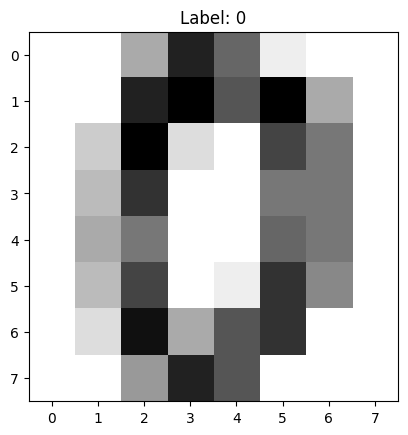

Datos aplanados de la primera imagen:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [15]:
# Cargar el conjunto de datos de dígitos
digits = datasets.load_digits()

# imagen
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f'Label: {digits.target[0]}')
plt.show()

# Mostrar 64 valores que corresponden a los píxeles de la imageN
print("Datos aplanados de la primera imagen:\n", digits.data[0])


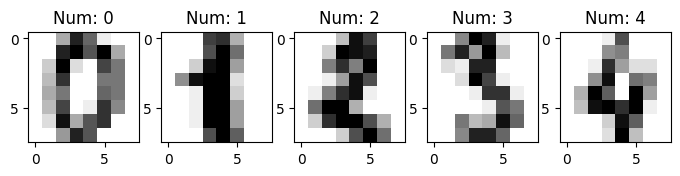

In [26]:
#Más ejemplos
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Num: {label}')
plt.show()

#**Parte 4**

  Aplicar estadistica descriptiva y extraer conclusiones

In [29]:

df_digits = pd.DataFrame(digits.data)

#
print(df_digits.describe())


           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     

In [ ]:
#

#**Parte 5**

Visualización: Box plot y scatter plot

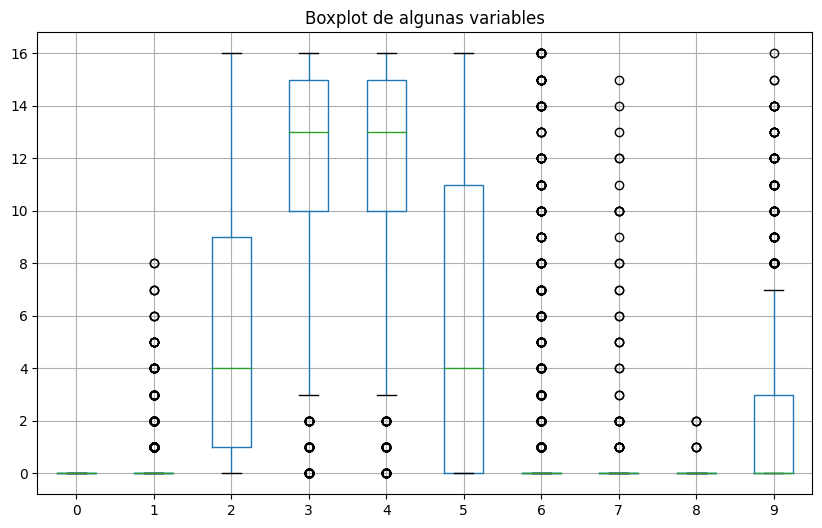

In [30]:
## Boxplot de algunas variables
df_digits.iloc[:, :10].boxplot(figsize=(10, 6))
plt.title("Boxplot de algunas variables")
plt.show()


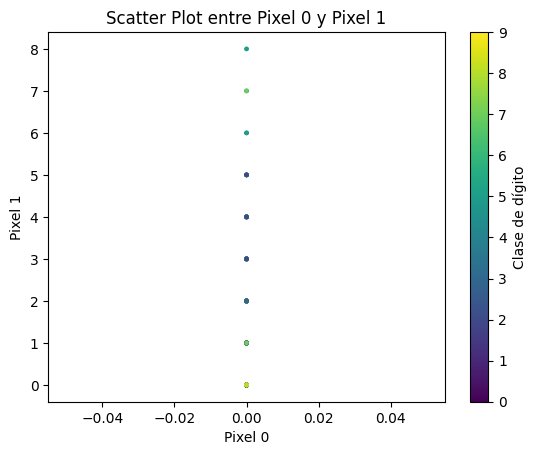

In [31]:
# Scatter plot entre las dos primeras columnas
plt.scatter(df_digits[0], df_digits[1], c=digits.target, cmap='viridis', s=5)
plt.xlabel('Pixel 0')
plt.ylabel('Pixel 1')
plt.title("Scatter Plot entre Pixel 0 y Pixel 1")
plt.colorbar(label='Clase de dígito')
plt.show()


#**Parte 6**

  K-means con todas las variables

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con todas las variables: 0.79


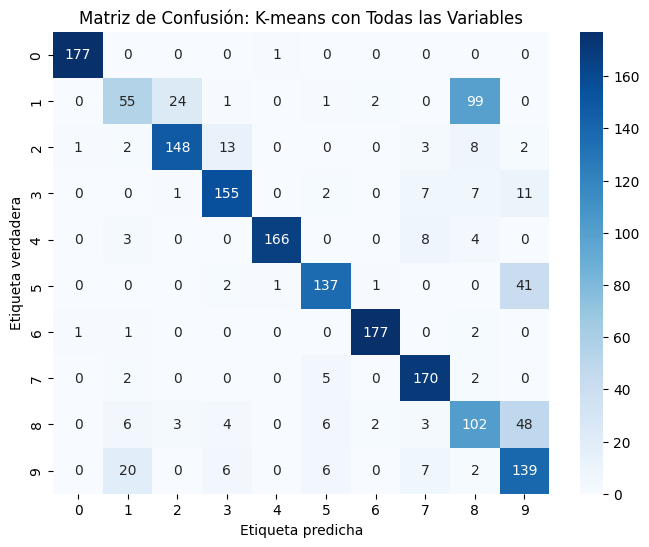

In [41]:
digits = datasets.load_digits()

# Realizar K-means con todas las variables (64 características por imagen)
kmeans_all = KMeans(n_clusters=10, random_state=42)
clusters_all = kmeans_all.fit_predict(digits.data)

# Asignar etiquetas a los clusters según la mayoría
labels_all = np.zeros_like(clusters_all)
for i in range(10):
    mask = (clusters_all == i)
    labels_all[mask] = mode(digits.target[mask])[0]

# Calcular la exactitud
accuracy_all = accuracy_score(digits.target, labels_all)
print(f"Exactitud del clustering con todas las variables: {accuracy_all:.2f}")

# Mostrar la matriz
conf_mat_all = confusion_matrix(digits.target, labels_all)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_all, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusión: K-means con Todas las Variables")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


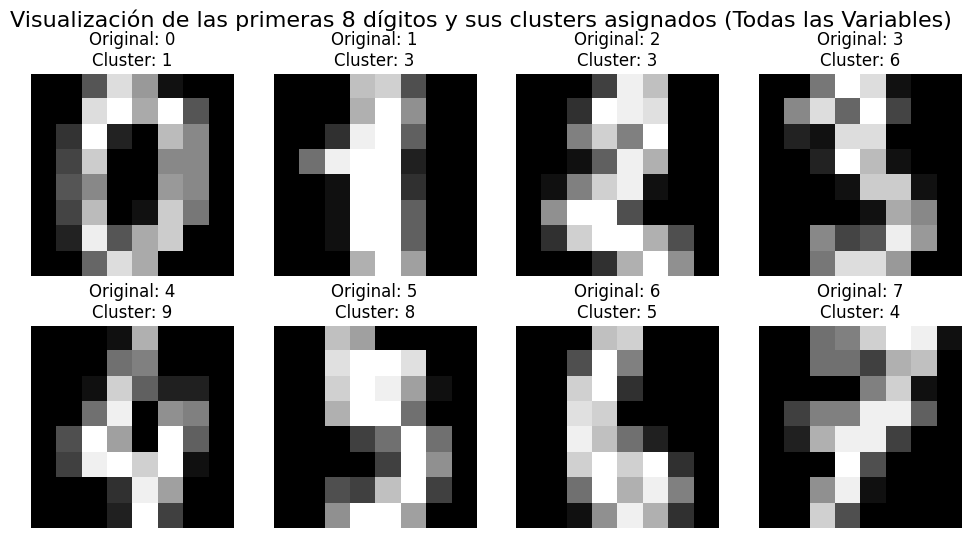

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
from scipy.stats import mode

# Cargar el conjunto de datos de dígitos
digits = datasets.load_digits()

# Realizar K-means con todas las variables (64 características por imagen)
kmeans_all = KMeans(n_clusters=10, random_state=42)
clusters_all = kmeans_all.fit_predict(digits.data)

# Asignar etiquetas a los clusters según la mayoría
labels_all = np.zeros_like(clusters_all)
for i in range(10):
    mask = (clusters_all == i)
    labels_all[mask] = mode(digits.target[mask])[0]

# Visualizar las primeras 8 imágenes con etiquetas originales y asignadas
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Original: {digits.target[i]}\nCluster: {clusters_all[i]}')
    plt.axis('off')

plt.suptitle("Visualización de las primeras 8 dígitos y sus clusters asignados (Todas las Variables)", fontsize=16)
plt.show()


#**Parte 7**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 0: 0.38


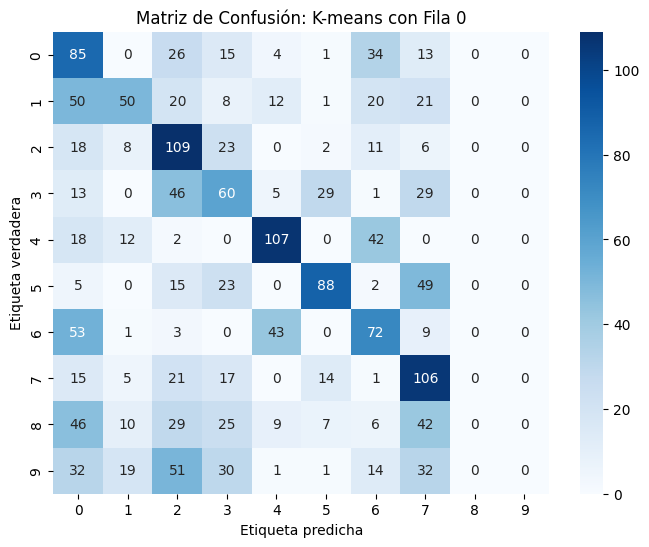

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 1: 0.37


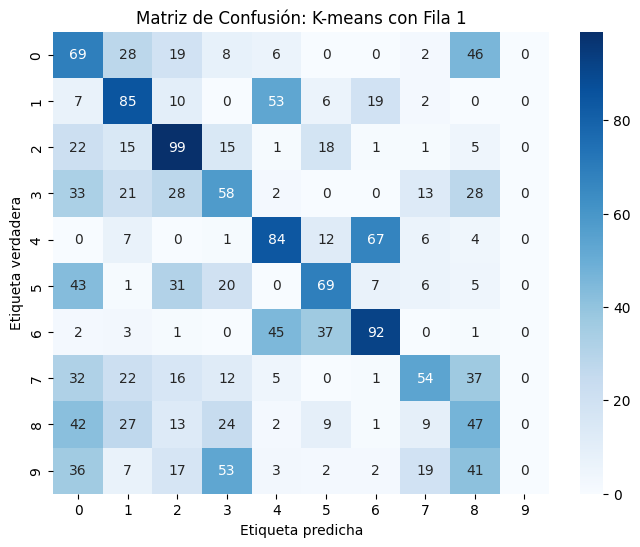

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 2: 0.48


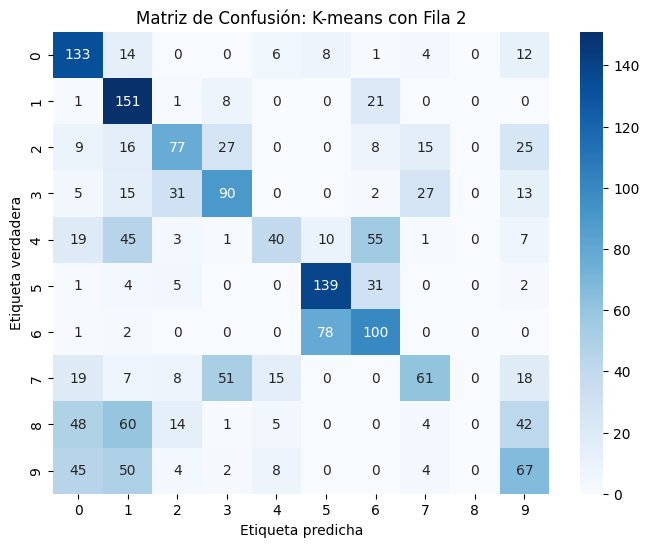

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 3: 0.45


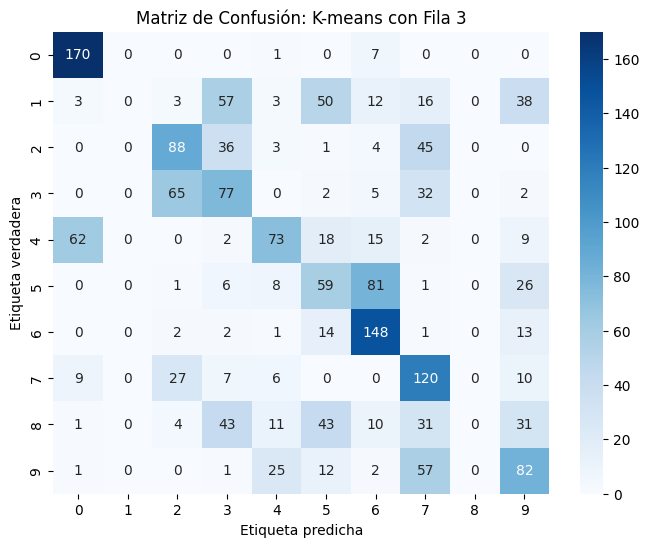

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 4: 0.46


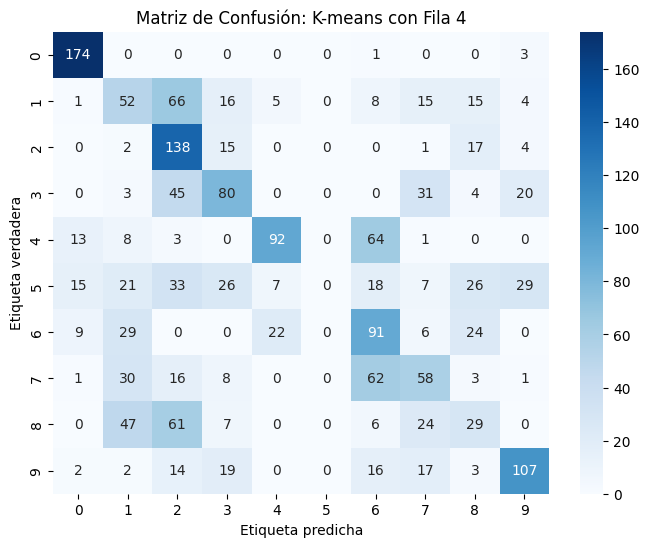

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 5: 0.45


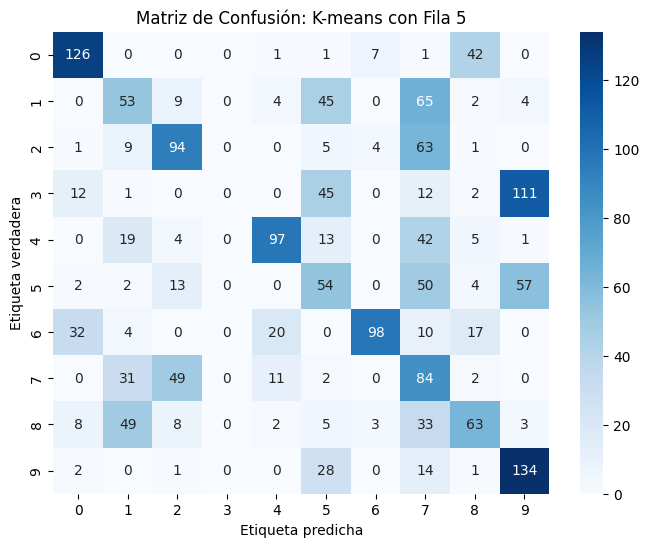

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 6: 0.39


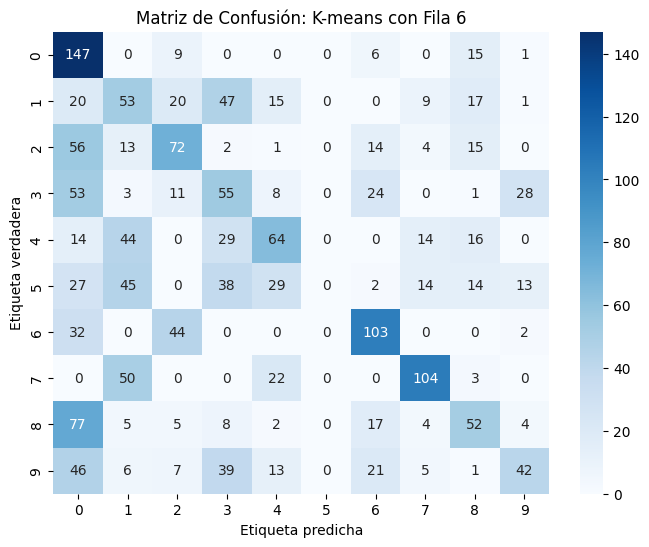

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con fila 7: 0.41


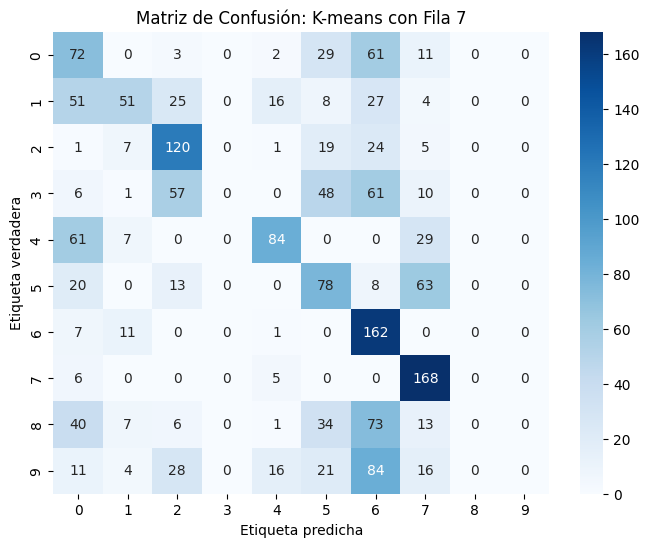

In [44]:
digits = datasets.load_digits()

# Realizar clustering para cada fila
for fila in range(8):
    row_data = digits.images[:, fila, :].reshape(len(digits.images), -1) #selecciona las variables

    kmeans_row = KMeans(n_clusters=10, random_state=42)
    clusters_row = kmeans_row.fit_predict(row_data)

    # Asignar etiquetas a los clusters según la mayoría
    labels_row = np.zeros_like(clusters_row)
    for i in range(10):
        mask = (clusters_row == i)
        labels_row[mask] = mode(digits.target[mask])[0]

    # Calcular la exactitud
    accuracy_row = accuracy_score(digits.target, labels_row)
    print(f"Exactitud del clustering con fila {fila}: {accuracy_row:.2f}")

    # Mostrar la matriz de confusión
    conf_mat_row = confusion_matrix(digits.target, labels_row)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat_row, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta verdadera")
    plt.title(f"Matriz de Confusión: K-means con Fila {fila}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


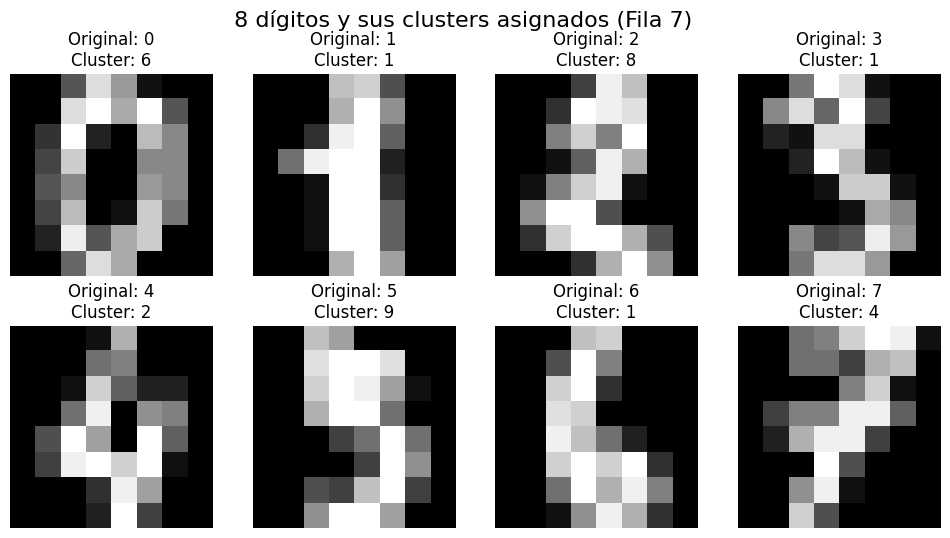

In [62]:
#Por fila
fila = 7
row_data = digits.images[:, fila, :].reshape(len(digits.images), -1)


kmeans_row = KMeans(n_clusters=10, random_state=42)
clusters_row = kmeans_row.fit_predict(row_data)

labels_row = np.zeros_like(clusters_row)
for i in range(10):
    mask = (clusters_row == i)
    labels_row[mask] = mode(digits.target[mask])[0]

# Visualizar las primeras 8 imágenes
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Original: {digits.target[i]}\nCluster: {clusters_row[i]}')
    plt.axis('off')

plt.suptitle(f" 8 dígitos y sus clusters asignados (Fila {fila})", fontsize=16)
plt.show()


#**Parte 8**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 0: 0.11


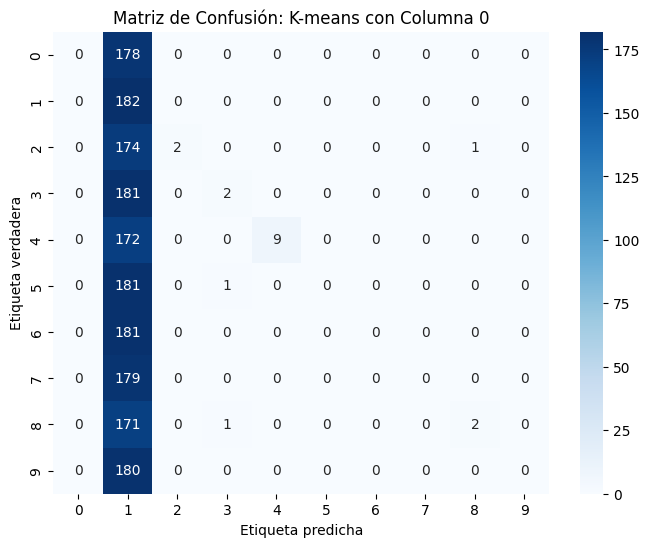

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 1: 0.34


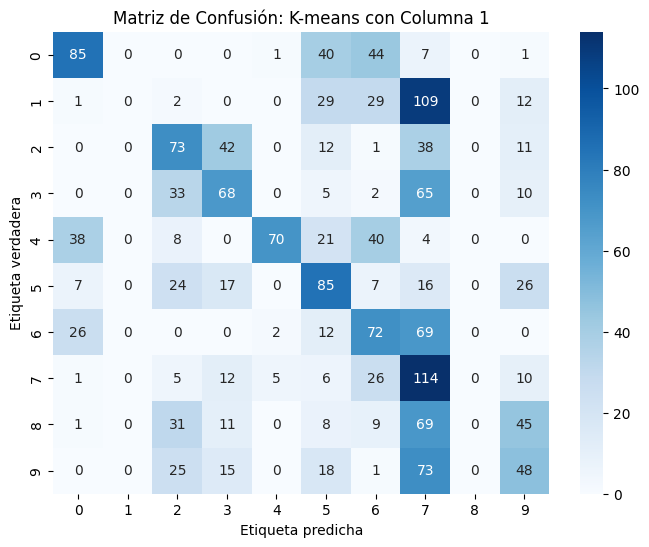

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 2: 0.47


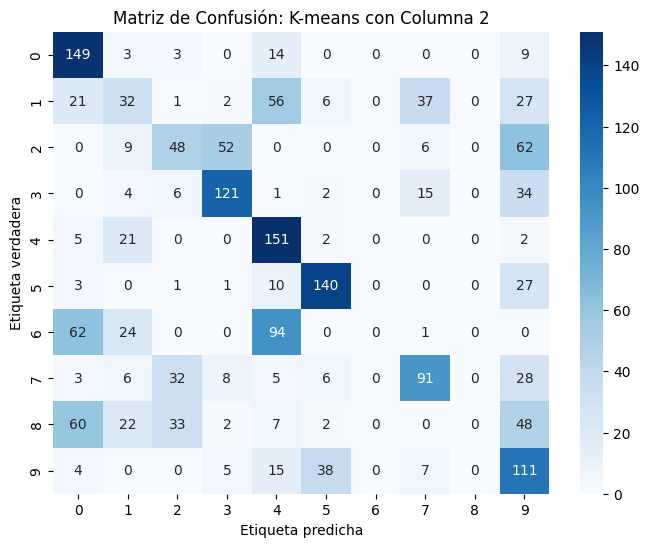

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 3: 0.42


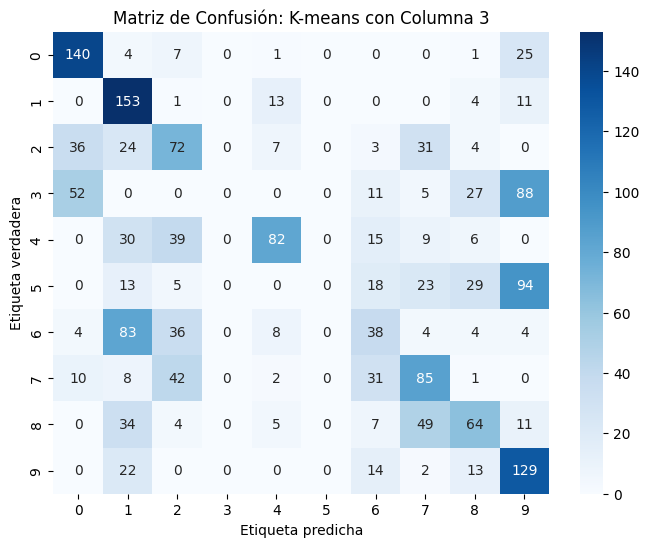

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 4: 0.51


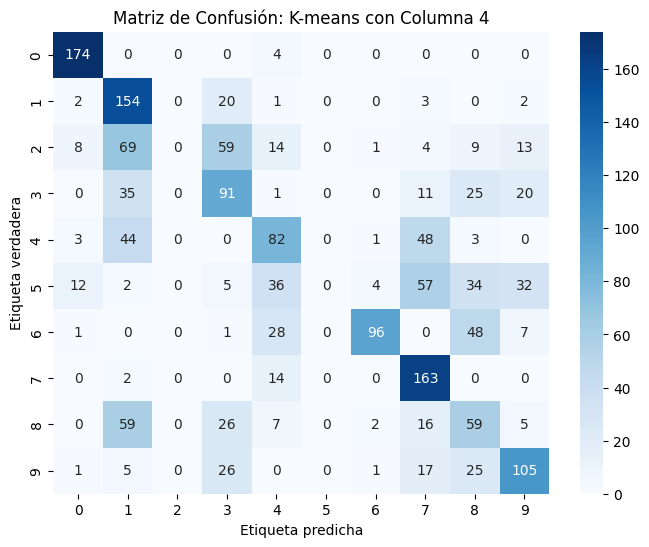

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 5: 0.53


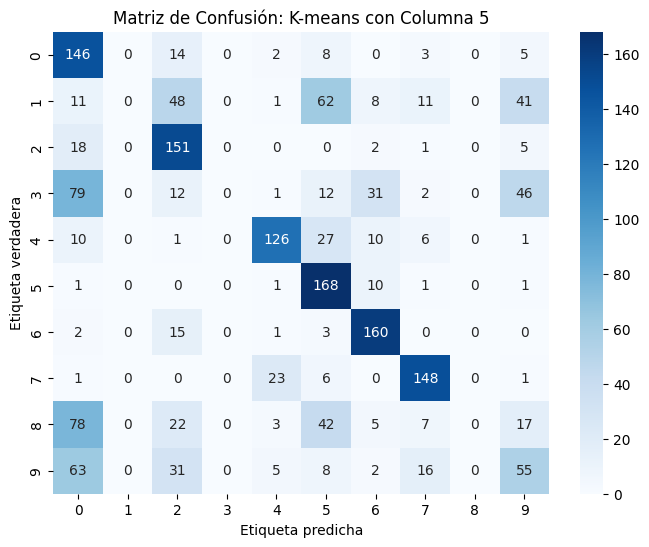

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 6: 0.41


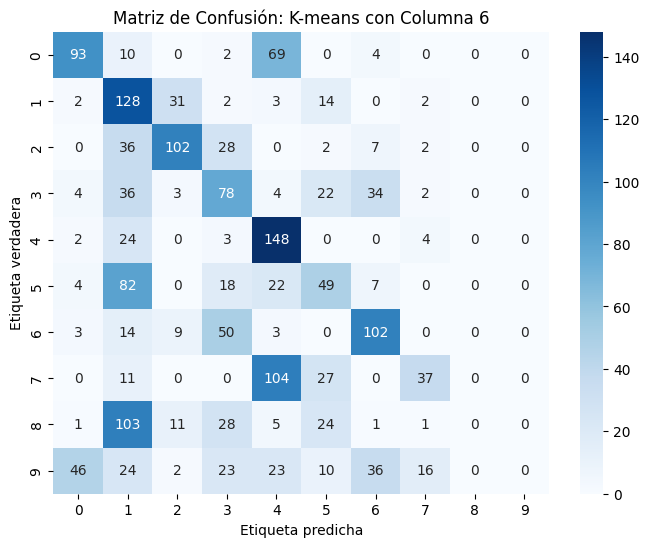

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exactitud del clustering con columna 7: 0.15


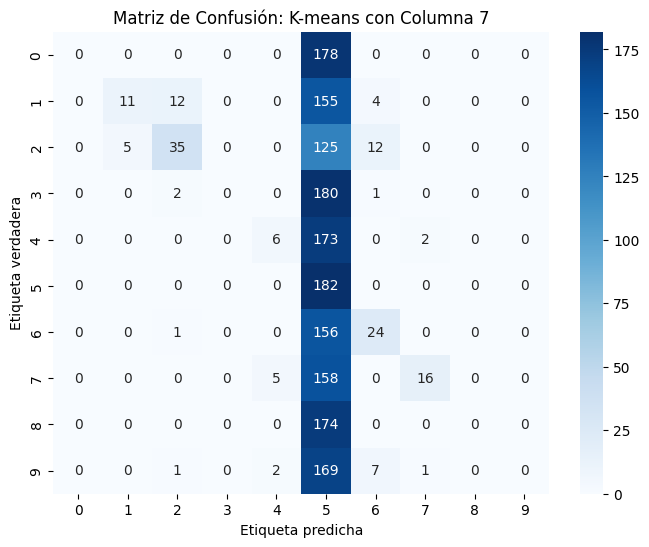

In [52]:
## Realizar clustering para cada columna (de 0 a 7)
for columna in range(8):
    col_data = digits.images[:, :, columna].reshape(len(digits.images), -1)

    kmeans_col = KMeans(n_clusters=10, random_state=42)
    clusters_col = kmeans_col.fit_predict(col_data)

    labels_col = np.zeros_like(clusters_col)
    for i in range(10):
        mask = (clusters_col == i)
        labels_col[mask] = mode(digits.target[mask])[0]

    # Calcular la exactitud
    accuracy_col = accuracy_score(digits.target, labels_col)
    print(f"Exactitud del clustering con columna {columna}: {accuracy_col:.2f}")

    # Mostrar la matriz de confusión
    conf_mat_col = confusion_matrix(digits.target, labels_col)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat_col, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta verdadera")
    plt.title(f"Matriz de Confusión: K-means con Columna {columna}")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


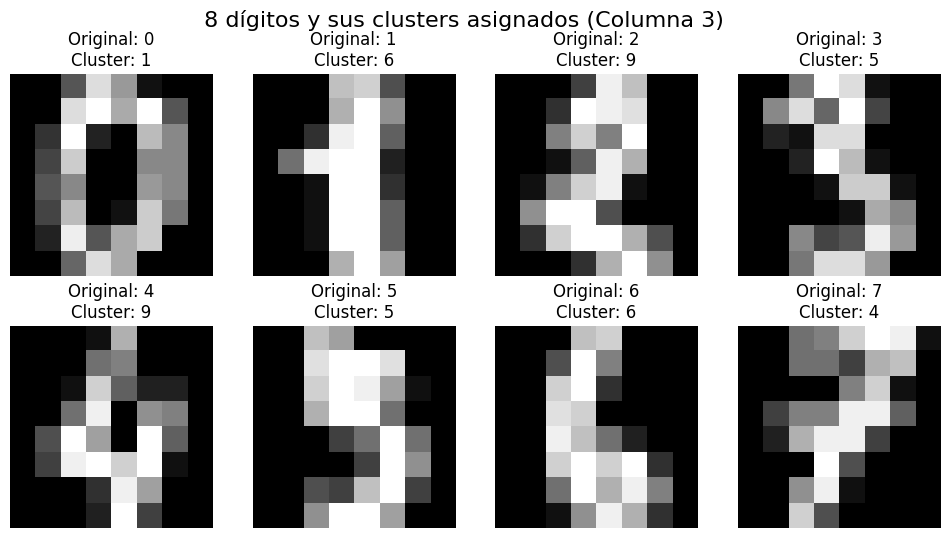

In [61]:
#Por columna
columna = 3

col_data = digits.images[:, :, columna].reshape(len(digits.images), -1)

kmeans_col = KMeans(n_clusters=10, random_state=42)
clusters_col = kmeans_col.fit_predict(col_data)

labels_col = np.zeros_like(clusters_col)
for i in range(10):
    mask = (clusters_col == i)
    labels_col[mask] = mode(digits.target[mask])[0]

# Visualizar las primeras 8 imágenes
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Original: {digits.target[i]}\nCluster: {clusters_col[i]}')
    plt.axis('off')

plt.suptitle(f" 8 dígitos y sus clusters asignados (Columna {columna})", fontsize=16)
plt.show()


#**Para cada digito**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


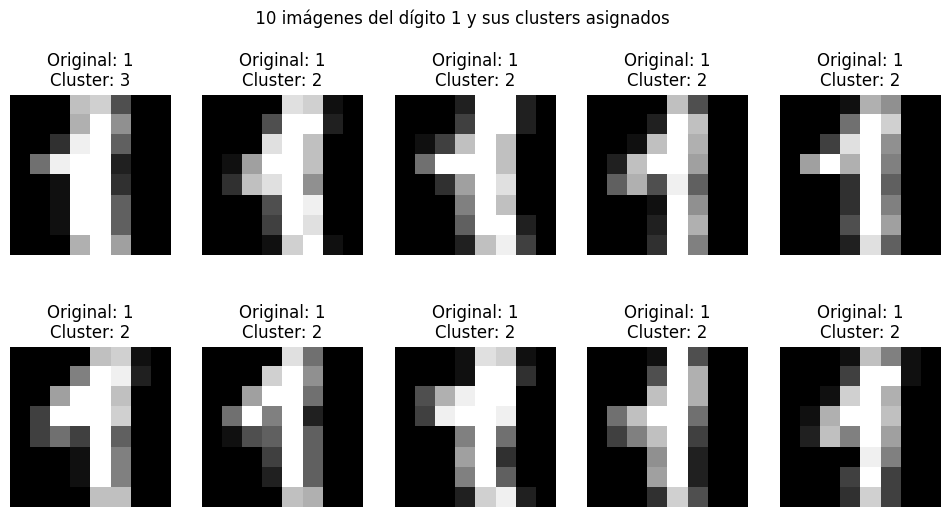

In [60]:

digits = datasets.load_digits()

# Realizar K-means con todas las variables (64 características por imagen)
kmeans_all = KMeans(n_clusters=10, random_state=42)
clusters_all = kmeans_all.fit_predict(digits.data)

labels_all = np.zeros_like(clusters_all)
for i in range(10):
    mask = (clusters_all == i)
    labels_all[mask] = mode(digits.target[mask])[0]


selected_digit = 1
indices = np.where(digits.target == selected_digit)[0]

# Visualizar las primeras 10 imágenes del dígito seleccionado
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = indices[i]
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f'Original: {digits.target[index]}\nCluster: {clusters_all[index]}')
    plt.axis('off')

plt.suptitle(f" 10 imágenes del dígito {selected_digit} y sus clusters asignados", fontsize=12)
plt.show()
